In [2]:
import pandas as pd
import sqlite3

In [3]:
conn = sqlite3.connect('recipe_metadata.sqlite')
df = pd.read_sql('select * from recipes', conn)

In [4]:
df.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

    ...    yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  \
0   ...              0.0     0.0      0.0   0.0       0.0        0.0   
1   ...              0.0     0.0      0.0   0.0       0.0        0.0   
2   ...              0.0     0.0      0.0   0.0       0.0        0.0   
3   ...              0.0     0.0      0.0   0.0       0.0        0.0   
4   ...              0.0     0.0      0.0   0.0       0.0        0.0   

   leftovers  snack  snack week  turkey  
0        0.0    0.0         0.0     1.0  
1        0.0    0.0         0.0     0.0  
2        0.0    0.0         0.0     0.0  
3        0.0    0.0         0.0     0.0  
4        0.0    0.0         0.0     0.0  

[5 rows x 680 columns]

In [5]:
for column in df.columns:
    print(column)

title
rating
calories
protein
fat
sodium
#cakeweek
#wasteless
22-minute meals
3-ingredient recipes
30 days of groceries
advance prep required
alabama
alaska
alcoholic
almond
amaretto
anchovy
anise
anniversary
anthony bourdain
aperitif
appetizer
apple
apple juice
apricot
arizona
artichoke
arugula
asian pear
asparagus
aspen
atlanta
australia
avocado
back to school
backyard bbq
bacon
bake
banana
barley
basil
bass
bastille day
bean
beef
beef rib
beef shank
beef tenderloin
beer
beet
bell pepper
berry
beverly hills
birthday
biscuit
bitters
blackberry
blender
blue cheese
blueberry
boil
bok choy
bon appétit
bon app��tit
boston
bourbon
braise
bran
brandy
bread
breadcrumbs
breakfast
brie
brine
brisket
broccoli
broccoli rabe
broil
brooklyn
brown rice
brownie
brunch
brussel sprout
buffalo
buffet
bulgaria
bulgur
burrito
butter
buttermilk
butternut squash
butterscotch/caramel
cabbage
cake
california
calvados
cambridge
campari
camping
canada
candy
candy thermometer
cantaloupe
capers
caraway
cardamom


In [6]:
len(df.columns)

680

In [7]:
from scraper import get_seasonal_veggies

vegs = [item.lower() for item in get_seasonal_veggies('california')]
eligible_veggies = list(set(vegs) & set(df.columns))

ImportError: cannot import name 'MONGOPATH'

In [ ]:
view = df.loc[df[eligible_veggies].sum(axis=1) > 0]
print(len(df), len(view))

In [ ]:
for row in view.head():
    ingredients = []
    for column in view.columns:
        if view.loc[column, row] != 0:
            ingredients.append(column)
    print(ingredients)

In [ ]:
view.loc[df['rice'] == 1, 'title']

In [ ]:
MONGOPATH = 'mongodb://localhost:27017'
from pymongo import MongoClient
col = MongoClient(MONGOPATH).RECIPES.BB

In [ ]:
duped_ingredients = set()
for recipe in col.find():
    for ingredient in recipe['ingredients']:
        duped_ingredients.add(ingredient)
print(len(duped_ingredients))

In [ ]:
duped_ingredients

In [ ]:
from src.eda_utilities import t_sne, plot_tsne
plot_tsne(t_sne())

In [ ]:
import os
os.chdir('home/dal/PycharmProjects/Localvore/src')

In [8]:
from sklearn.manifold import TSNE
import pandas as pd
import altair as alt
import pickle
import numpy as np
from pymongo import MongoClient
MONGOPATH = 'mongodb://localhost:27017/'


def read_mongo(collection, query={}, noid=True):

    cursor = MongoClient(MONGOPATH).RECIPES[collection].find(query)
    df = pd.DataFrame(list(cursor))
    if noid:
        del df['_id']
    df['vector'] = df['vector'].apply(pickle.loads)

    return df


def t_sne(df=read_mongo('BB')):

    X = df['vector'].values
    X_train = np.vstack(X)
    X_embedded = TSNE(n_iter=5000).fit_transform(X_train)
    df['tsne_dim1'] = X_embedded[:, 0]
    df['tsne_dim2'] = X_embedded[:, 1]
    return df


def plot_tsne(df=t_sne()):

    alt.Chart(df).mark_circle(size=60).encode(
        x='tsne_dim1',
        y='tsne_dim2',
        tooltip=['title', 'keywords']
    ).interactive()


In [9]:
plot_tsne()

In [10]:
full_bb = t_sne()

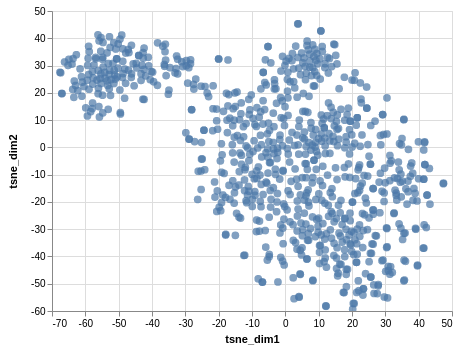

In [11]:
alt.renderers.enable('notebook')
data = {'x': full_bb['tsne_dim1'], 'y': full_bb['tsne_dim2'], 'on_hover': full_bb['title']}
alt.Chart(full_bb).mark_circle(size=60).encode(
        x='tsne_dim1:Q',
        y='tsne_dim2:Q',
        tooltip='title:N'
    ).interactive()

In [12]:
full_bb.plot.scatter(x='tsne_dim1',
        y='tsne_dim2',)

In [13]:
plot_tsne(t_sne(read_mongo('full_format_recipes')))